# Data Cleaning

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Read in csv as Data Frame
data_file = Path("Output/no_lie_for_real_left_off_here.csv")
df = pd.read_csv(data_file)
df.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Metascore,imdbRating,Rotten Tomatoes,imdbVotes,BoxOffice
0,Boyhood,2014,R,15 Aug 2014,165.0,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...",10.0,7.9,9.7,"370,906","$25,352,281"
1,Moonlight,2016,R,18 Nov 2016,111.0,Drama,Barry Jenkins,"Barry Jenkins, Tarell Alvin McCraney","Mahershala Ali, Naomie Harris, Trevante Rhodes",A young African-American man grapples with his...,9.9,7.4,9.8,"336,819","$27,854,932"
2,Roma,2018,R,14 Dec 2018,135.0,Drama,Alfonso Cuarón,Alfonso Cuarón,"Yalitza Aparicio, Marina de Tavira, Diego Cort...",A year in the life of a middle-class family's ...,9.6,7.7,9.6,"171,928",NaN
3,Manchester by the Sea,2016,R,16 Dec 2016,137.0,Drama,Kenneth Lonergan,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandler",A depressed uncle is asked to take care of his...,9.6,7.8,9.6,"321,828","$47,695,371"
4,Gravity,2013,PG-13,04 Oct 2013,91.0,"Drama, Sci-Fi, Thriller",Alfonso Cuarón,"Alfonso Cuarón, Jonás Cuarón","Sandra Bullock, George Clooney, Ed Harris","Dr Ryan Stone, an engineer on her first time o...",9.6,7.7,9.6,"872,078","$274,092,705"


In [4]:
# Extract columns of interest
df = df[['Title', 'Released', 'Genre', 'imdbRating']]
df.head()

,Title,Released,Genre,imdbRating
0,Boyhood,15 Aug 2014,Drama,7.9
1,Moonlight,18 Nov 2016,Drama,7.4
2,Roma,14 Dec 2018,Drama,7.7
3,Manchester by the Sea,16 Dec 2016,Drama,7.8
4,Gravity,04 Oct 2013,"Drama, Sci-Fi, Thriller",7.7


In [5]:
# Split Released Date into Day, Month, Year Columns
df[['Day', 'Month', 'Year']] = df['Released'].str.split(' ', n=-1, expand=True)
df.drop('Released', axis=1, inplace=True)
df.head()

,Title,Genre,imdbRating,Day,Month,Year
0,Boyhood,Drama,7.9,15,Aug,2014
1,Moonlight,Drama,7.4,18,Nov,2016
2,Roma,Drama,7.7,14,Dec,2018
3,Manchester by the Sea,Drama,7.8,16,Dec,2016
4,Gravity,"Drama, Sci-Fi, Thriller",7.7,04,Oct,2013


In [6]:
# Replace Month string with numeric
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df.Month = df.Month.map(month_map)

In [7]:
# Drops all na and clean Years and Months
df = df[df['Month'].notna()]
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df = df.loc[(df['Year']>=2010) & (df['Year']<=2019), :]

In [8]:
# Find day of the year and quarter of each film

# Create a temperary df containing only day, month, year
temp_df = df[['Day', 'Month', 'Year']]

# Convert to datetime format
temp_df['Date_Time'] = pd.to_datetime(temp_df)

# Add day of year and quarter column to df
df['Day of Year'] = temp_df['Date_Time'].dt.dayofyear
df = df.loc[df['Day of Year']!=366, :]
df['Quarter'] = temp_df['Date_Time'].dt.quarter

df.head()

/var/folders/gf/hc_hshm92zgfnkr16xjn90700000gn/T/ipykernel_25796/3183335074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Date_Time'] = pd.to_datetime(temp_df)


,Title,Genre,imdbRating,Day,Month,Year,Day of Year,Quarter
0,Boyhood,Drama,7.9,15,8,2014,227,3
1,Moonlight,Drama,7.4,18,11,2016,323,4
2,Roma,Drama,7.7,14,12,2018,348,4
3,Manchester by the Sea,Drama,7.8,16,12,2016,351,4
4,Gravity,"Drama, Sci-Fi, Thriller",7.7,04,10,2013,277,4


# ---------------------------------------

# Visualizations

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [10]:
# Clean imdbRating column
df = df[df['imdbRating'].notna()]
df['imdbRating'] = df['imdbRating'].astype(float)

## Bar Graphs
Shows number of films per time period

In [77]:
# Function creates bar graph for specified column and figure size
def bar(col, size):
    grouped_period = pd.DataFrame(df.groupby(col)['Title'].count())
    grouped_period.plot.bar(legend=False, ylabel="Number of Films", title=f'Number of films per {col}', rot=0, figsize=size)
    plt.show()

### Quarter

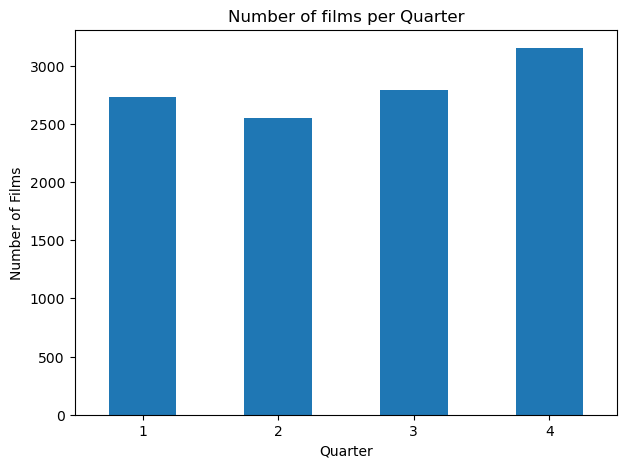

In [78]:
bar('Quarter', (7, 5))

### Month

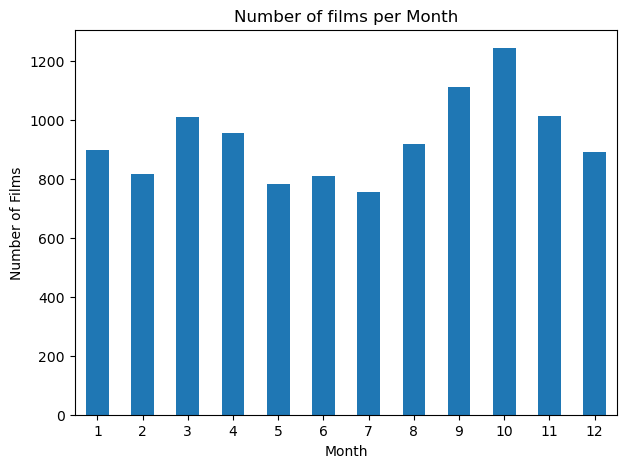

In [79]:
bar('Month', (7, 5))

### Day of Year

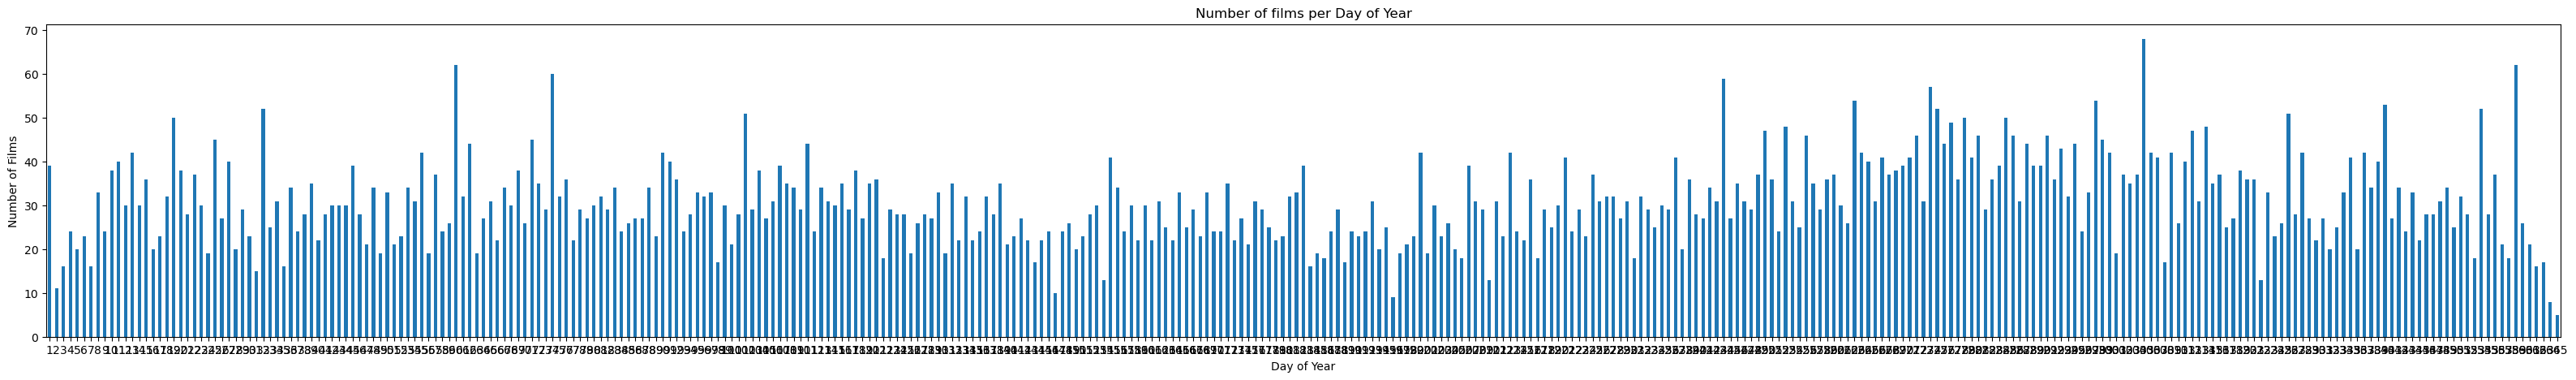

In [80]:
bar('Day of Year', (40, 5))

## Boxplots
Shows boxplot of film ratings per time period

In [43]:
# Function creates boxplot for specified column
def box(col):
    
    # List of Lables
    labels = sorted(df[col].unique())
    
    # Collect data for each time period
    rating_data = []
    for period in labels:
    
        # Isolates data for each quarter
        period_data = df.loc[df[col]==period, 'imdbRating'].values
        rating_data.append(period_data)
    
    # Performs Anova test 
    print(stats.f_oneway(*rating_data))
        
    # Creates boxplot
    plt.boxplot(rating_data, labels=labels, flierprops=dict(markerfacecolor='red', marker='o', markersize=12))

    # Creates labels
    plt.xlabel(col)
    plt.ylabel('IMDB Rating')
    plt.title(f'IMDB Rating per {col}')
    plt.ylim(0, 10)

    # Displays Boxplot
    plt.tight_layout()
    plt.show()


### Quarter

F_onewayResult(statistic=7.109835018523414, pvalue=9.075915203343608e-05)


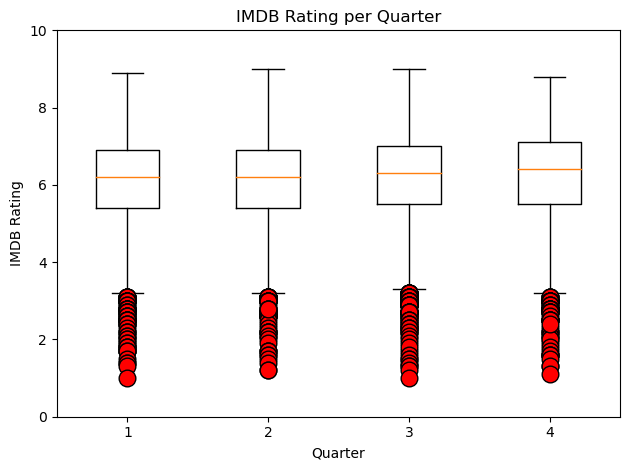

In [44]:
box('Quarter')

### Month

F_onewayResult(statistic=3.1669738886503525, pvalue=0.00026767992039853294)


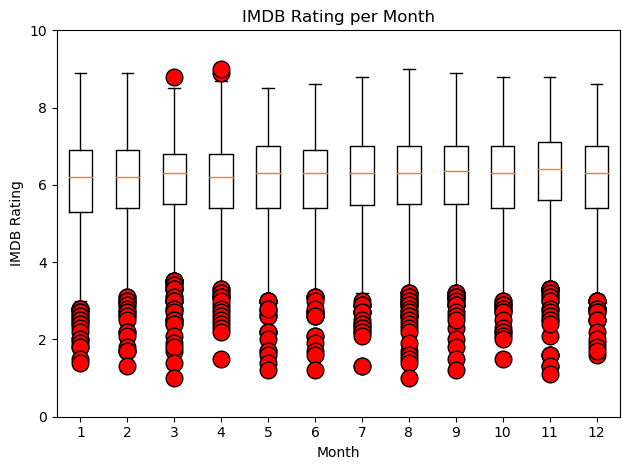

In [45]:
box('Month')

### Day of Year

F_onewayResult(statistic=1.1104042752906131, pvalue=0.07550909810016686)


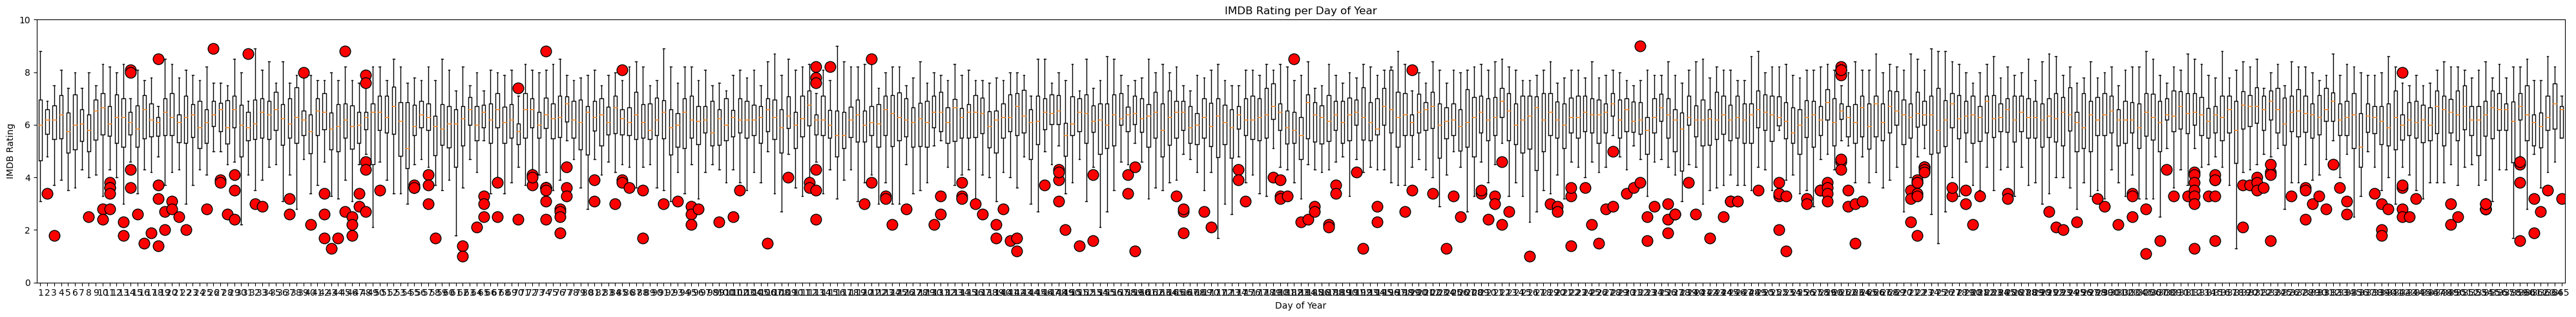

In [46]:
plt.figure(figsize=(40, 5)) 
box('Day of Year')


##  Scatterplots
Shows film ratings over time

In [47]:
# Plots regression line and Finds correlation coefficient (r^2)
def lin_reg(x, y):
    # Find slope and intercept of regression line, set linear
    b, a = np.polyfit(x, y, deg=1)
    
    # Plot regression line
    xseq = np.linspace(min(x), max(x))
    plt.plot(xseq, a + b * xseq, color="r")
    
    # Display reg line's equation
    line_eq = "y = " + str(round(b,2)) + "x + " + str(round(a,2))
    plt.annotate(line_eq,(1, 3),fontsize=15,color="red")

    # Calculate and print correlation coefficient
    r = np.corrcoef(x, y)
    r_2 = '{0:.2f}'.format(r[0, 1]**2)
    print(f'The r^2-value is: {r_2}')


In [56]:
# Function creates scatter plot for specified column
def scatter(col):
    period_list = sorted(df[col].unique())

    avg_rating_list = []
    for period in period_list:

        # Isolates data for each quarter
        period_data = df.loc[df[col]==period, 'imdbRating'].mean()
        avg_rating_list.append(period_data)

    # Displays regression line, equation, and r^2 value
    lin_reg(period_list, avg_rating_list)
    
    # Create scatter plot
    plt.scatter(period_list, avg_rating_list)
    
    # Formatting
    plt.xlabel(col)
    plt.ylabel('Average IMDB Rating')
    plt.title(f'Average IMDB Rating per {col}')
    plt.ylim(0, 10)
    plt.show()

### Quarter

The r^2-value is: 0.97


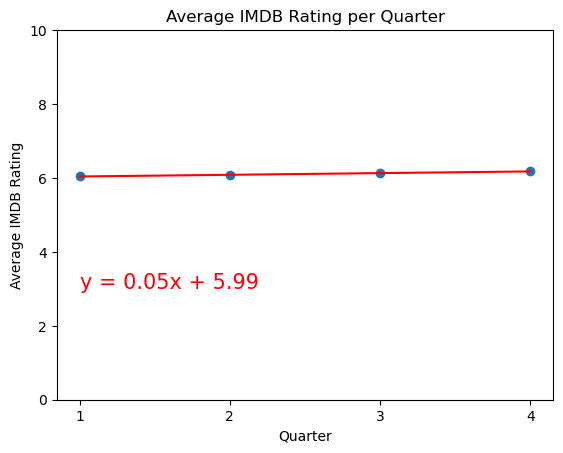

In [58]:
plt.xticks([i+1 for i in range(4)])
scatter("Quarter")

### Month

The r^2-value is: 0.66


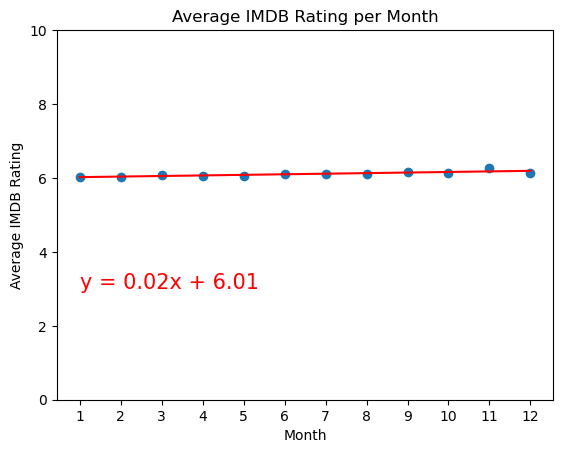

In [61]:
plt.xticks([i+1 for i in range(12)])
scatter("Month")

### Day of Year

The r^2-value is: 0.05


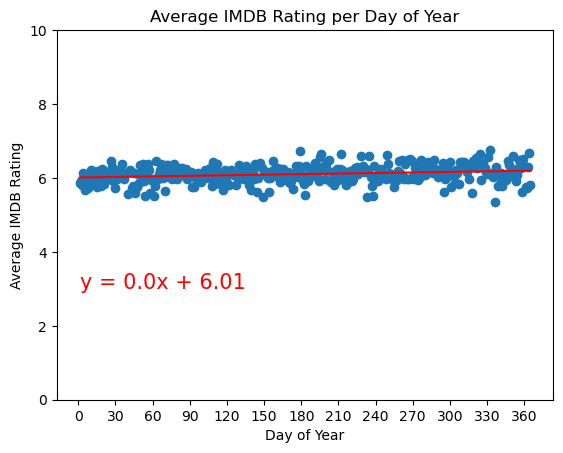

In [67]:
plt.xticks([30*i for i in range(37)])
scatter("Day of Year")

# --------------------------------------------

# Analysis

## Box Plots
The boxplots show the relationship between release date and IMDB Rating. There are three boxplots, one for each quarter, month, and day of the year of the film's release. These three graphs all show very little variance between each time period's boxplot. An anova test was ran for each graph to test the significance of the data. A significance level of 0.05 was chosen before the tests were ran. The Quarterly, Monthly, and Daily data had p-values of 9.07e-05, 0.000267, and 0.0755, respectively. The quarterly and monthly data are significantly correlated, while the daily data was just over the threashold.

## Scatter Plots
The scatter plots show the relationship between release date and average IMDB rating. There again are three scatter plots for quarterly, monthly, and daily release date. A linear regression line is plotted for each graph. The Quarterly, Monthly, and Daily regression lines had slopes of 0.05, 0.02, and 0.00, and correlation coefficients (r^2) of 0.97, 0.66, 0.05, respectively. It is seen by the regression lines' slopes, that there is nearly no affect in release date and IMDB rating. 

## Further Analysis
The p-values in the boxplots and the r^2 values in the scatterplots show that there is less significance in the data the smaller the time periods that are being analyzed. This is due to the sample size of the data. There is an average of 2,804.75 films released per quarter, but only 30.74 films released per day of the year. If there was a larger sample size, the daily data would get more and more significant. The shorter the time periods get, the smaller the sample size is for each time period, making it less meaningful for the analysis. If this project was redone, a larger sample size could be used to get more meaningful data for each day of the year. 